# **Optimizers**

an optimizer is a crucial element that fine-tunes(updating weights) a neural network’s parameters during training. Its primary role is to minimize the model’s error or loss function, enhancing performance

# Important Deep Learning Terms

# **Epoch** ;  one forward propagation and one backward propagation is called  epoch  The number of times the algorithm runs on the whole training dataset.

# **iteration** : An iteration is one step where the model updates its parameters.
#If batch size is equal to the entire dataset, then 1 epoch = 1 iteration.
#If batch size is smaller, then 1 epoch has multiple iterations.

#Example Without Batch Size
#Let's assume:

#Dataset size = 1,000 samples

#Epochs = 3

#If you process the whole dataset at once (Batch size = 1,000):

#1 epoch = 1 iteration

#3 epochs = 3 iterations

#If you process one sample at a time (Batch size = 1):

#1 epoch = 1,000 iterations

#3 epochs = 3,000 iterations



# **Sample –** A single row of a dataset.

# **Batch –** It denotes the number of samples to be taken to for updating the model parameters.

# **Learning rate –** It is a parameter that provides the model a scale of how much model weights should be updated.

# **Cost Function/Loss Function –** A cost function is used to calculate the cost, which is the difference between the predicted value and the actual value.

# **Weights/ Bias –** The learnable parameters in a model that controls the signal between two neurons.

# Idea of Gradient Descent

Let’s say you are playing a game in which the players are at the top of a mountain and asked to reach the lowest point of the mountain. Additionally, they are blindfolded. So, what approach do you think would make you reach the lake?

Take a moment to think about this before you read on.

The best way is to observe the ground and find where the land descends. From that position, step in the descending direction and iterate this process until we reach the lowest point.

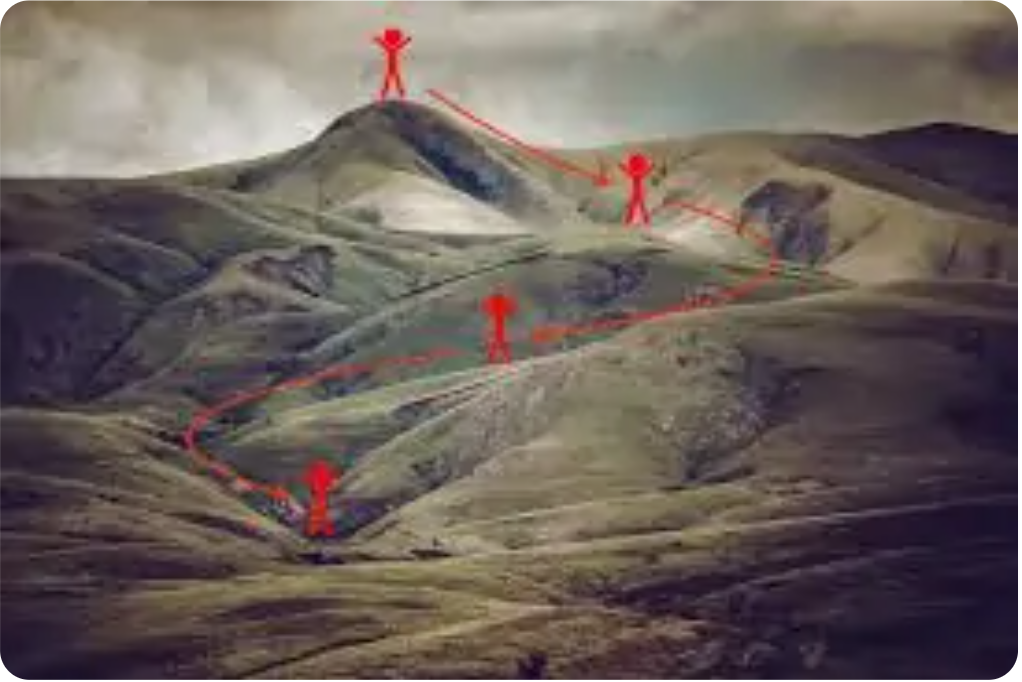

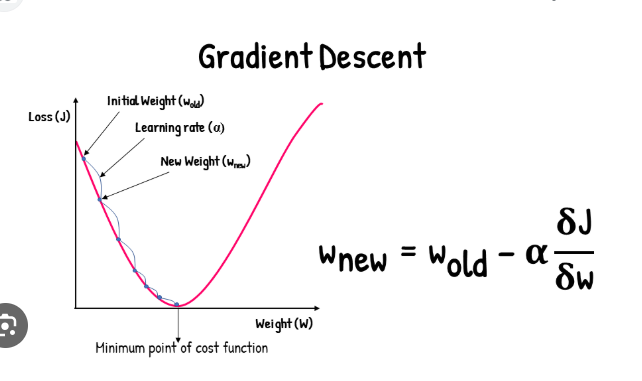

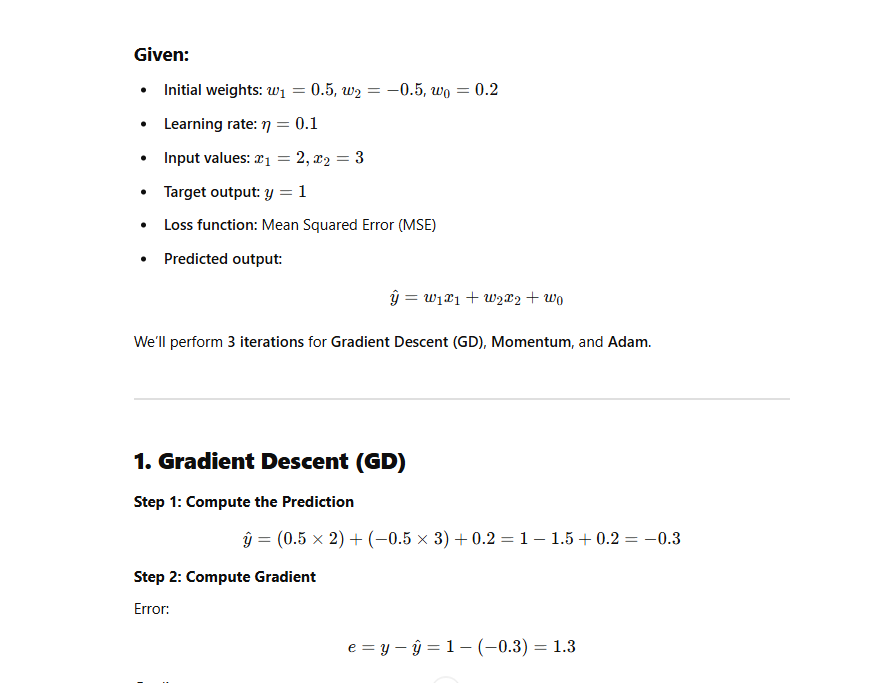

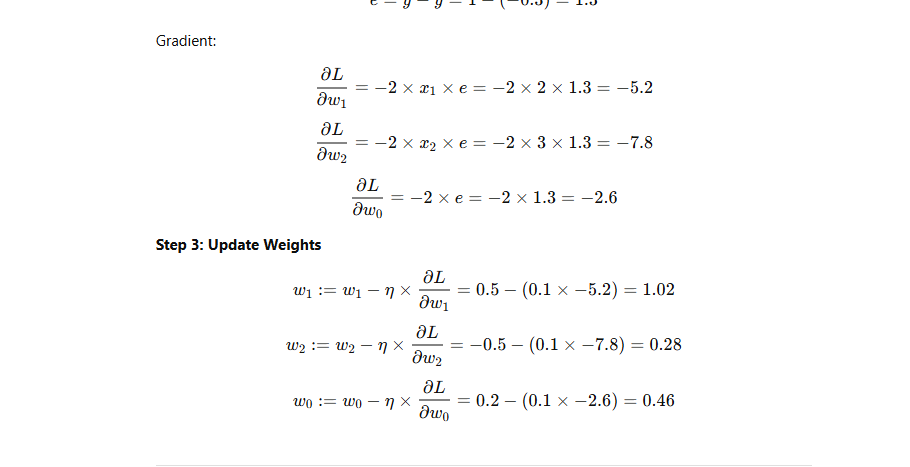

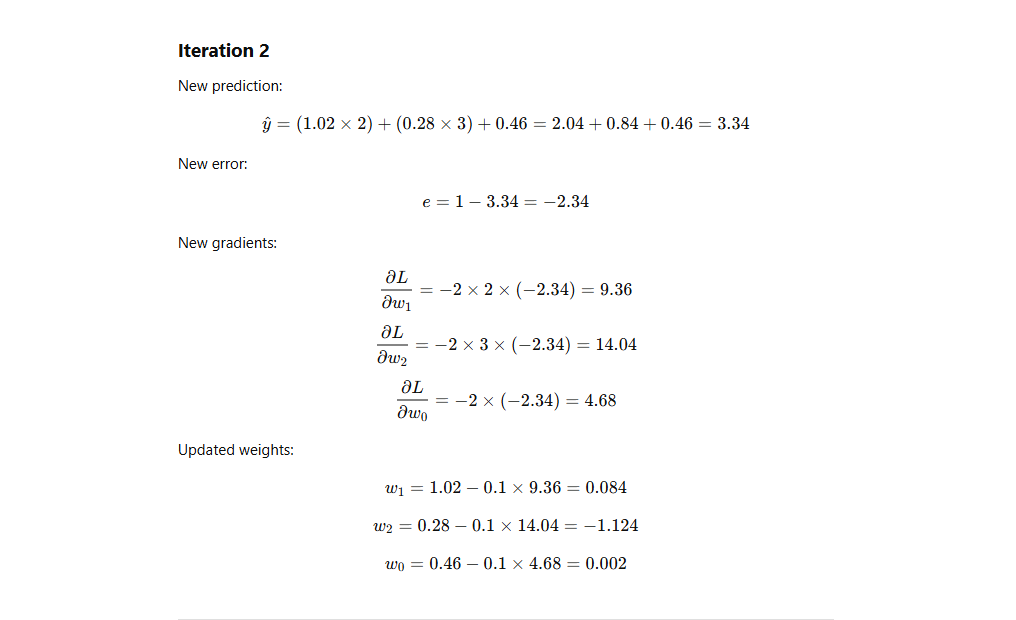

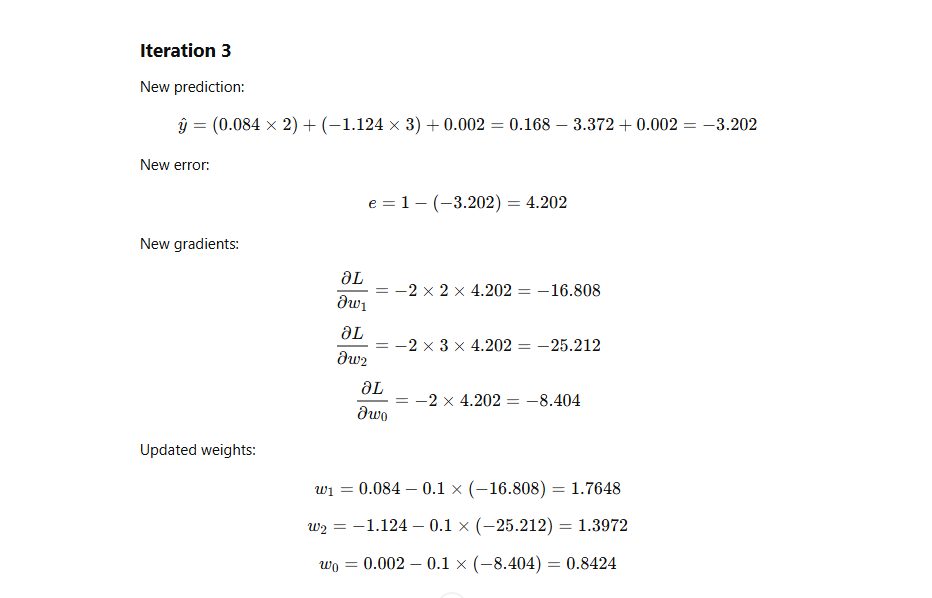

### gradient descent

**Gradient update rule:**
BGD uses the data of the entire training set to calculate the gradient of the cost function to the parameters:


 **Disadvantages:**
 Need huge  ram
Because this method calculates **the gradient for the entire data set in one update, the calculation is very slow**, it will be very tricky to encounter a large number of data sets, and you cannot invest in new data to update the model in real time.

We will define an iteration number epoch in advance, first calculate the gradient vector params_grad, and then update the parameter params along the direction of the gradient. The learning rate determines how big we take each step.

** gradient descent can converge to a global minimum for convex functions and to a local minimum for non-convex functions.**






#**SGD (Stochastic gradient descent)**



**Gradient update rule:**
Compared with BGD's calculation of gradients with all data at one time, SGD updates the gradient of each sample with each update.

`x += - learning_rate * dx`

where x is a parameter, dx is the gradient and learning rate is constant


For large data sets, there may be similar samples, so BGD calculates the gradient. **There will be redundancy,
and SGD is updated only once, there is no redundancy, it is faster, and new samples can be added.**

 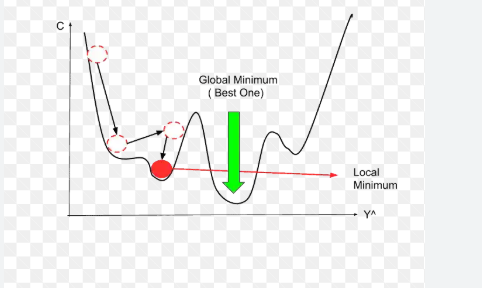

 **<center>Figure :- Fluctuations in SGD</center>**

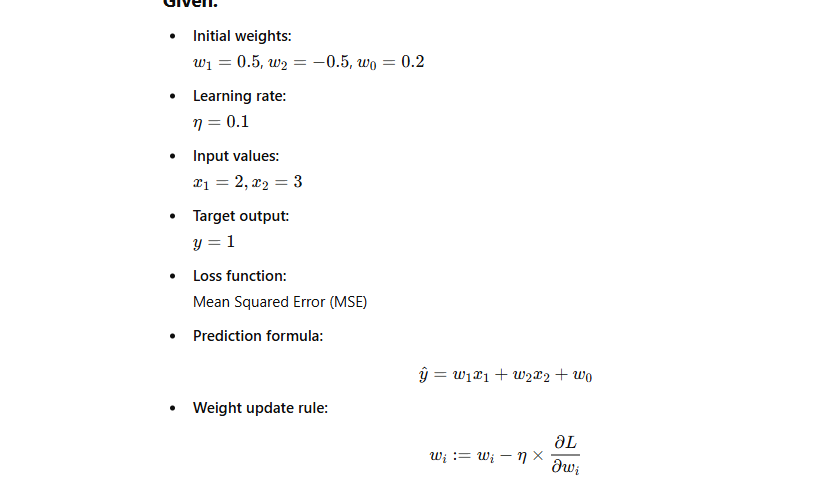

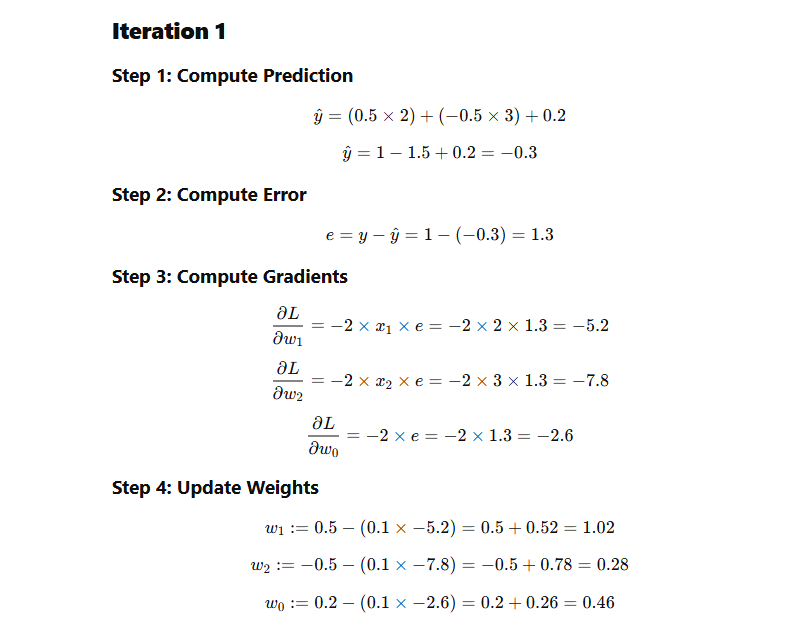

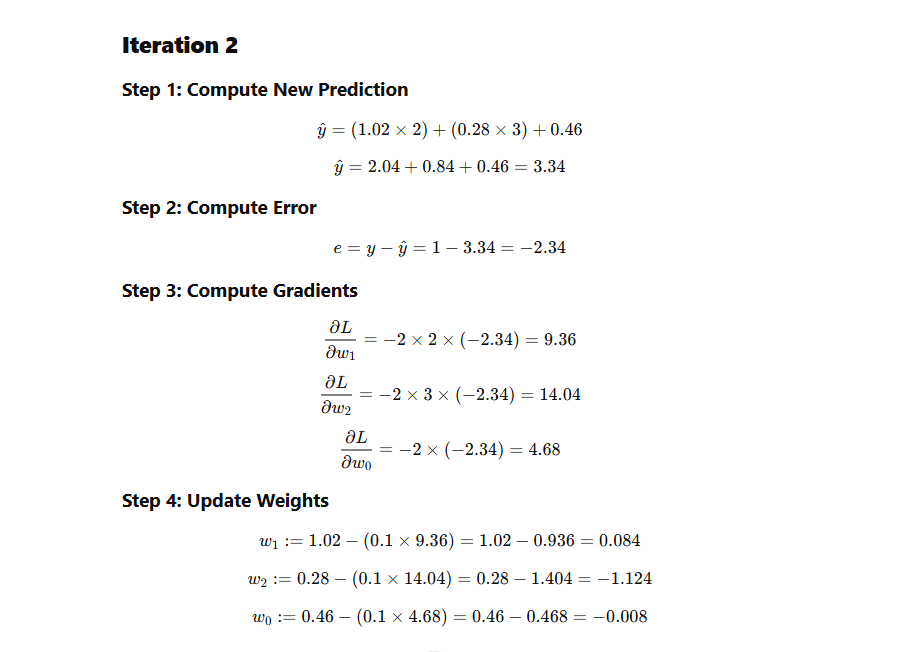


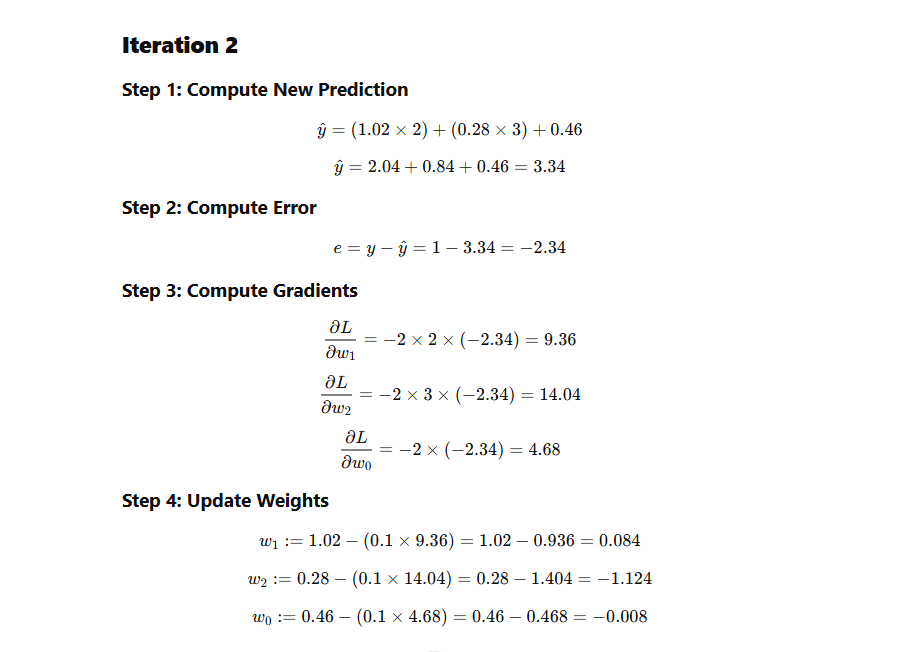

**Disadvantages:**
However, because SGD is updated more frequently, the cost function will have severe oscillations.
BGD can converge to a local minimum, of course, the oscillation of SGD may jump to a better local minimum.

When we decrease the learning rate slightly, the convergence of SGD and BGD is the same.

### Mini-batch Stichastic gradient descent

**Gradient update rule:**

MBGD uses a small batch of samples, that is, n samples to calculate each time. In
this way, it can reduce the variance when the parameters are updated, and the convergence is more stable.
 It can make full use of the highly optimized matrix operations in the deep learning library for more efficient gradient calculations.


**The difference from SGD is that each cycle does not act on each sample, but a batch with n samples.**
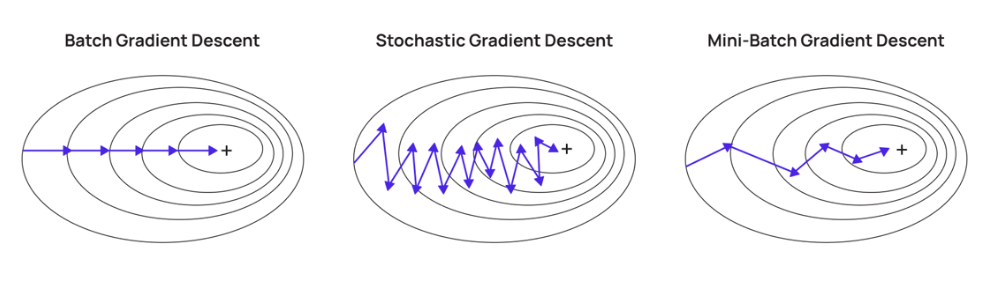
>Setting value of hyper-parameters:
n Generally value is 50 ～ 256

**Cons:**

* Mini-batch gradient descent does not guarantee good convergence,

* If the learning rate is too small, the convergence rate will be slow. If it is too large, the loss function will oscillate or even deviate at the minimum value.
One measure is to set a **larger learning rate**. When the change between two iterations is lower than a certain threshold, the learning rate is reduced.

However, the setting of this threshold needs to be written in advance adapt to the characteristics of the data set.

In addition, this method is to apply the **same learning rate** to all parameter updates. If our data is sparse, we would prefer to update the features with lower frequency.

In addition, for **non-convex functions**, it is also necessary to avoid trapping at the local minimum or saddle point, because the error around the saddle point is the same, the gradients of all dimensions are close to 0, and SGD is easily trapped here.

**Saddle points** are the curves, surfaces, or hypersurfaces of a saddle point neighborhood of a smooth function are located on different sides of a tangent to this point.
For example, this two-dimensional figure looks like a saddle: it curves up in the x-axis direction and down in the y-axis direction, and the saddle point is (0,0).



One disadvantage of the SGD method is that its update direction depends entirely on the current batch, so its update is very unstable. A simple way to solve this problem is to introduce momentum.

#**SGDMomentum **

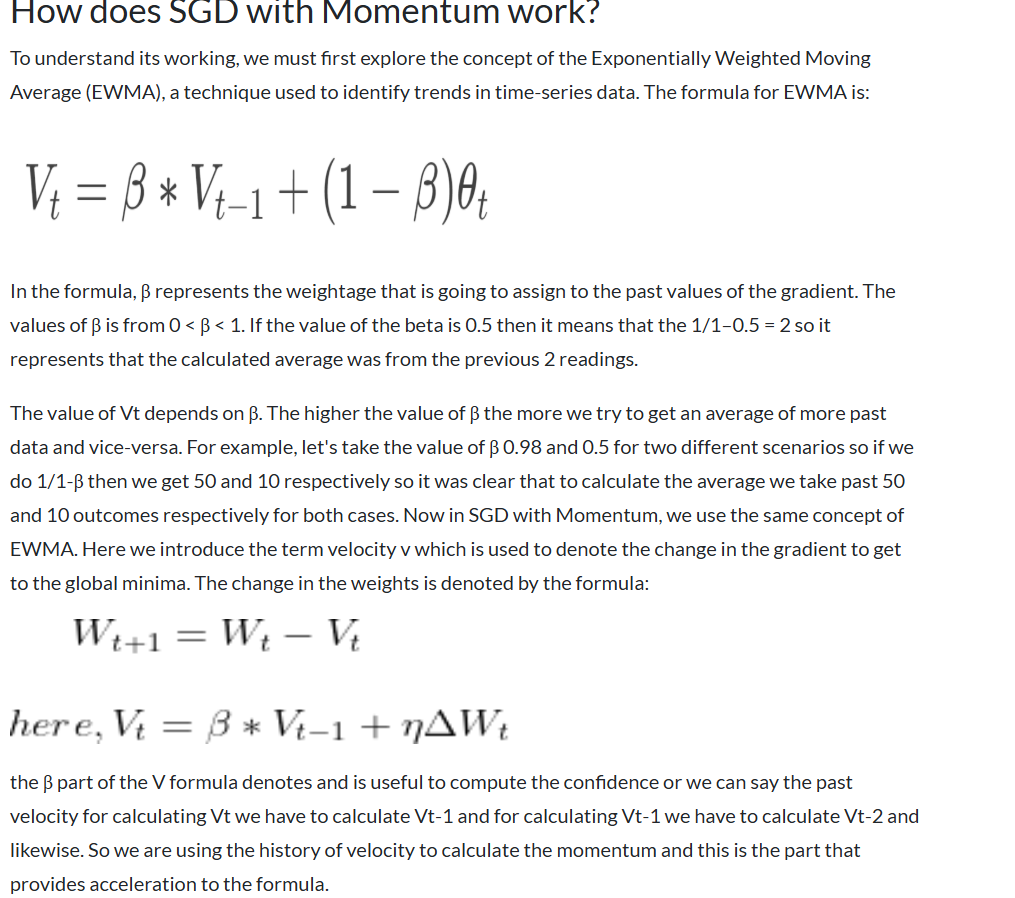

 (which simulates the inertia of an object when it is moving, that is, the direction of the previous update is retained to a certain extent during the update, while the current update gradient is used to fine-tune the final update direction. In this way, you can increase the stability to a certain extent, so that you can learn faster, and also have the ability to get rid of local optimization.)

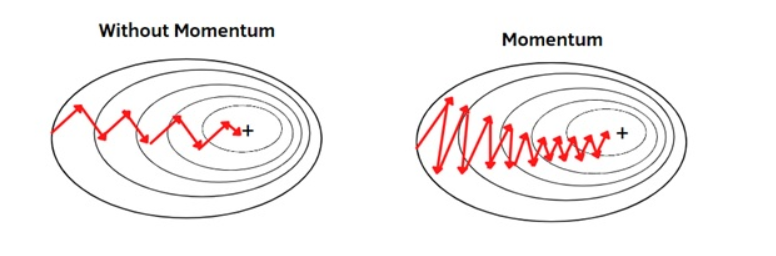

 **<center>Figure :- SGD without Momentum &&&  SGD without Momentum</center>**

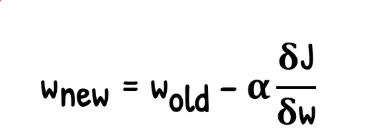

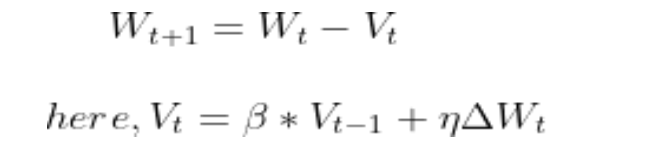

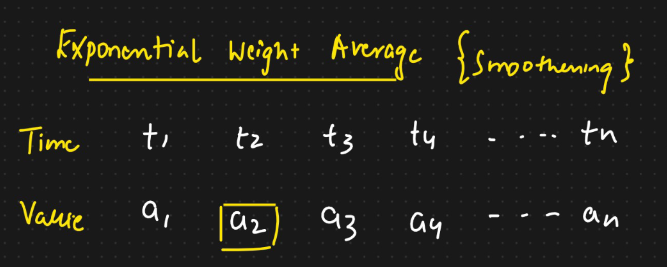

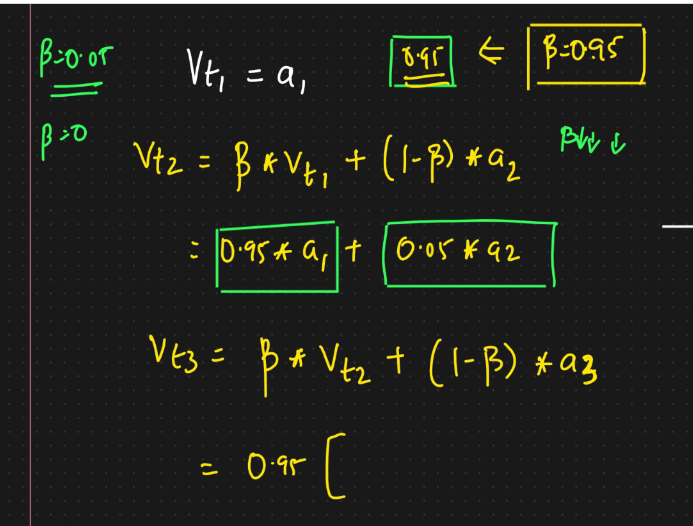

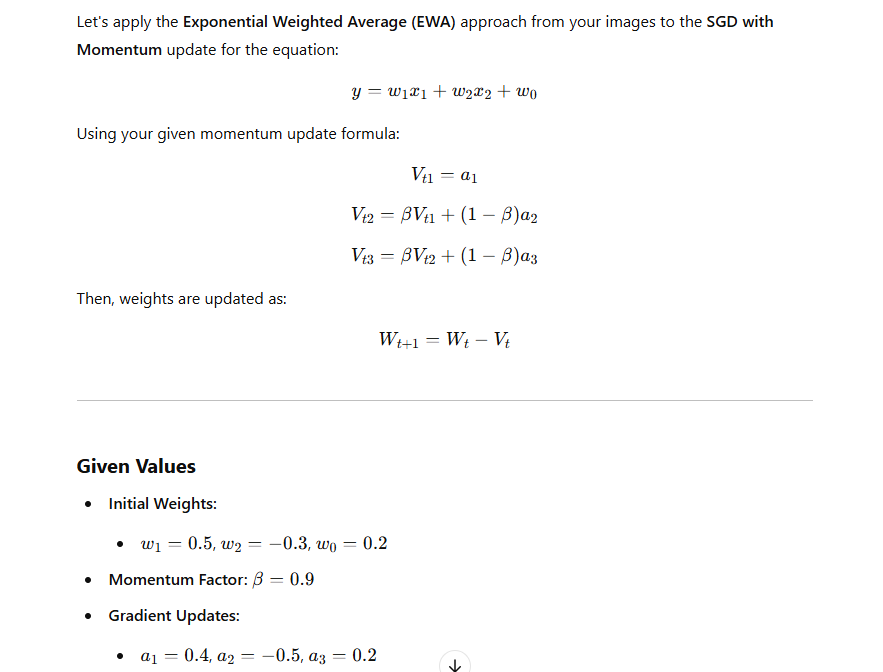

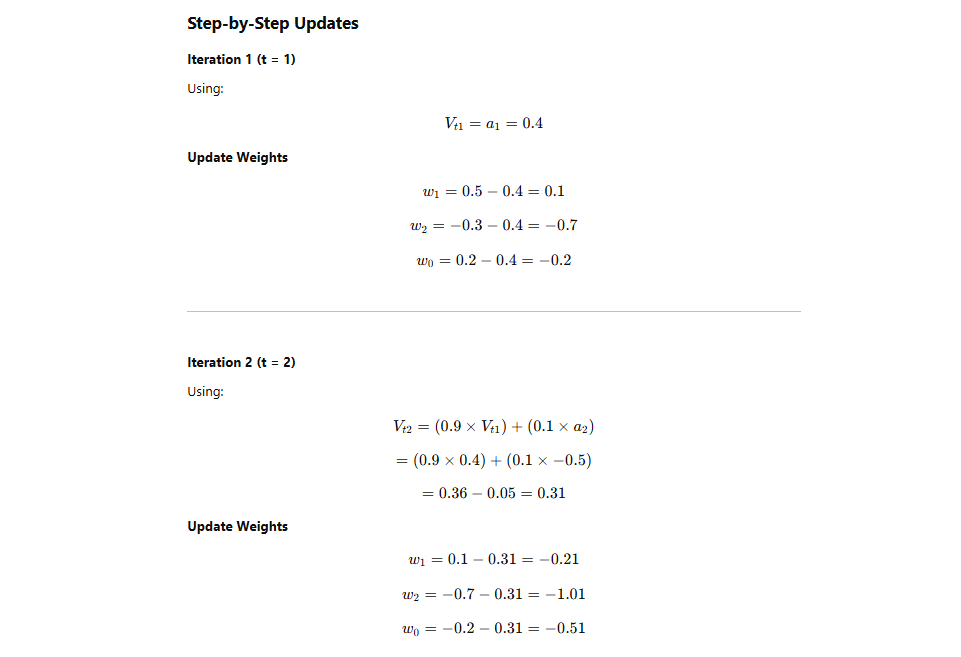

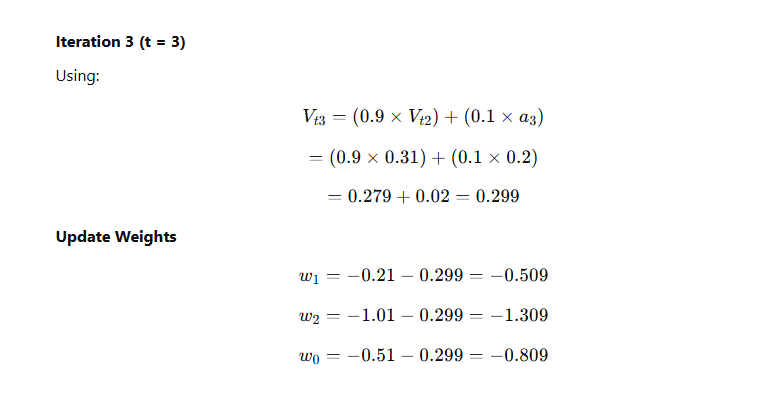

## Adagrad

The adaptive gradient descent algorithm is slightly different from other stochastic gradient descent momentum algorithms. This is because it uses different learning rates for each iteration. The change in learning rate depends upon the difference in the parameters during training. The more the parameters get changed, the more minor the learning rate changes. This modification is highly beneficial because real-world datasets contain sparse as well as dense features. So it is unfair to have the same value of learning rate for all the features. The Adagrad algorithm uses the below formula to update the weights. Here the alpha(t) denotes the different learning rates at each iteration, n is a constant, and E is a small positive to avoid division by 0.

So, it is well-suited for dealing with sparse data.

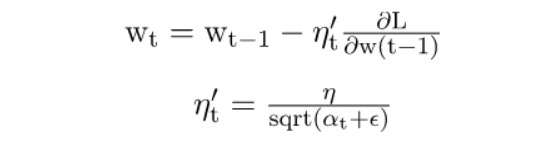

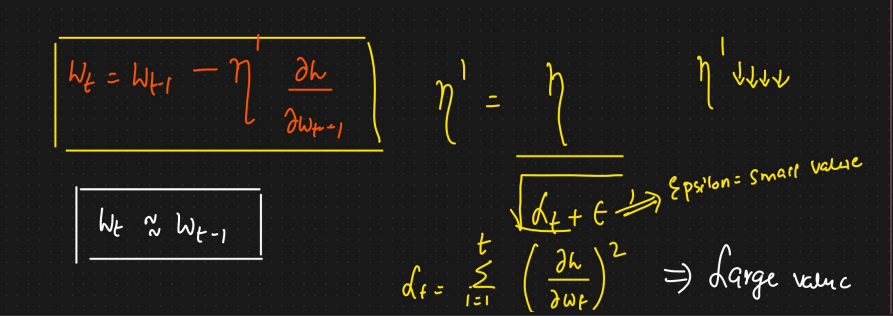

>**GloVe word embedding uses adagrad where infrequent words required a greater update and frequent words require smaller updates.**

>**Adagrad eliminates the need to manually tune the learning rate.**

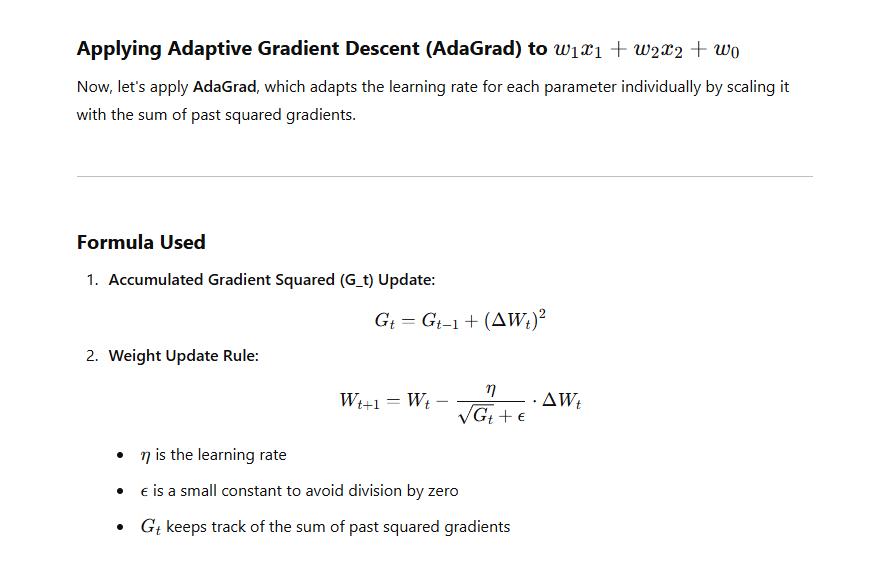

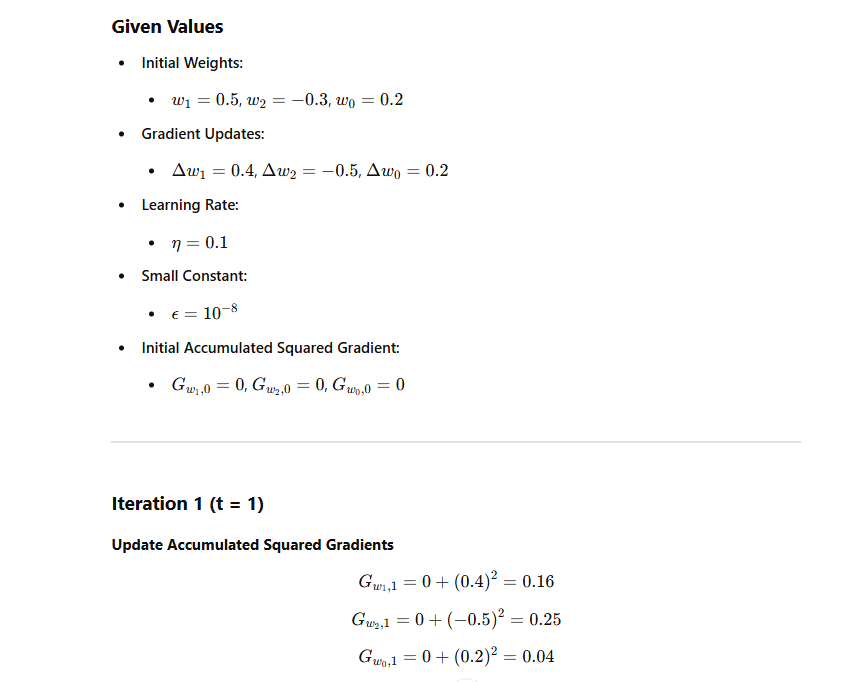

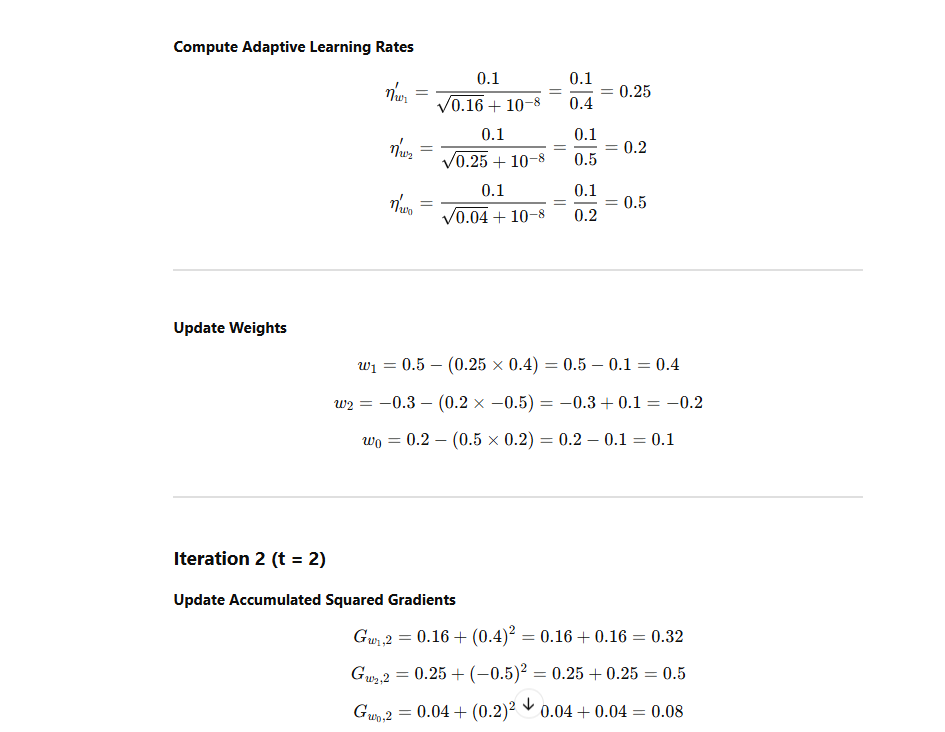

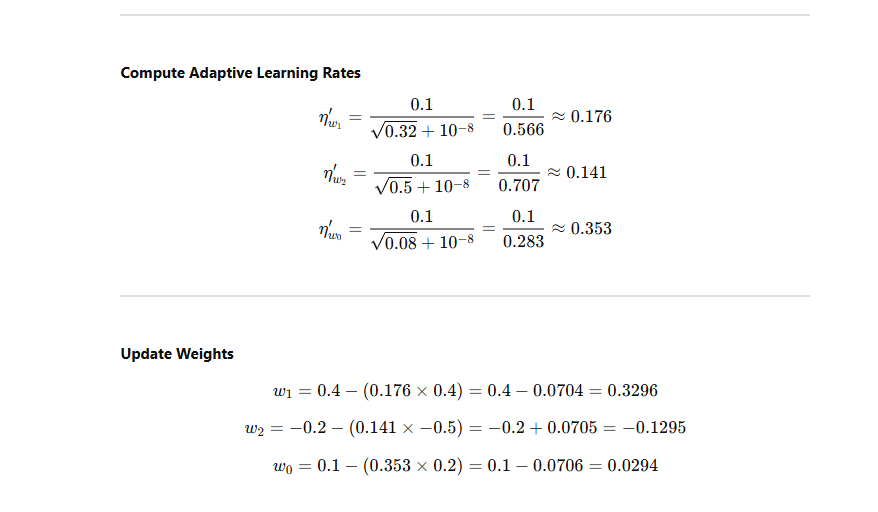

## Adadelta

There are three problems with the Adagrad algorithm

* The learning rate is monotonically decreasing.
* The learning rate in the late training period is very small.
* It requires manually setting a global initial learning rate.

>**Adadelta is an extension of Adagrad and it also tries to reduce Adagrad’s aggressive, monotonically reducing the learning rate.**

>It does this by restricting the window of the past accumulated gradient to some fixed size of w. Running average at time t then depends on the previous average and the current gradient.

>In Adadelta we do not need to set the default learning rate as we take the ratio of the running average of the previous time steps to the current gradient.

## RMSProp

The full name of RMSProp algorithm is called **Root Mean Square Prop**, which is an adaptive learning rate optimization algorithm proposed by Geoff Hinton.


>RMSProp tries to resolve Adagrad’s radically diminishing learning rates by using a moving average of the squared gradient. It utilizes the magnitude of the recent gradient descents to normalize the gradient.


Adagrad will accumulate all previous gradient squares, and RMSprop just calculates the corresponding average value, so it can alleviate the problem that the learning rate of the Adagrad algorithm drops quickly.

The difference is that RMSProp calculates the **differential squared weighted average of the gradient** . This method is beneficial to eliminate the direction of large swing amplitude, and is used to correct the swing amplitude, so that the swing amplitude in each dimension is smaller. On the other hand, it also makes the network function converge faster.


>In RMSProp learning rate gets adjusted automatically and it chooses a different learning rate for each parameter.

>RMSProp divides the learning rate by the average of the exponential decay of squared gradients

## Adam

**Adaptive Moment Estimation (Adam)** is another method that computes adaptive learning rates for each parameter. In addition to storing an exponentially decaying average of past squared gradients like Adadelta and RMSprop.

>Adam also keeps an exponentially decaying average of past gradients, similar to momentum.

>Adam can be viewed as a combination of Adagrad and RMSprop,(Adagrad) which works well on sparse gradients and (RMSProp) which works well in online and nonstationary settings repectively.

>Adam implements the **exponential moving average of the gradients** to scale the learning rate instead of a simple average as in Adagrad. It keeps an exponentially decaying average of past gradients.

>Adam is computationally efficient and has very less memory requirement.

>Adam optimizer is one of the most popular and famous gradient descent optimization algorithms.

## Comparisions

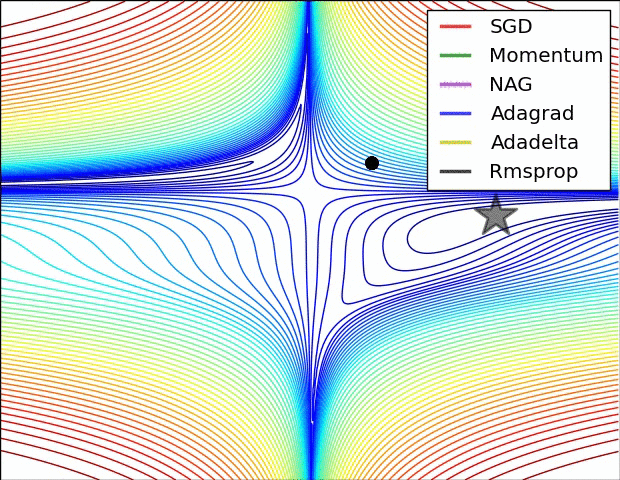



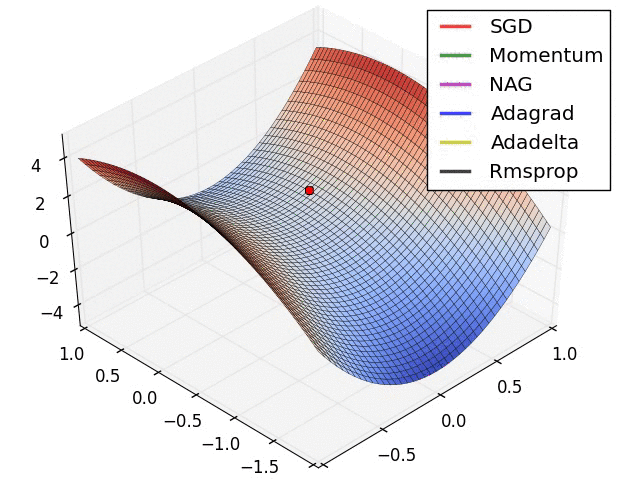

















# How to choose optimizers?

- If the data is sparse, use the self-applicable methods, namely Adagrad, Adadelta, RMSprop, Adam.

- RMSprop, Adadelta, Adam have similar effects in many cases.

- Adam just added bias-correction and momentum on the basis of RMSprop,

- As the gradient becomes sparse, Adam will perform better than RMSprop.

**Overall, Adam is the best choice.**

>SGD is used in many papers, without momentum, etc. Although SGD can reach a minimum value, it takes longer than other algorithms and may be trapped in the saddle point.

- If faster convergence is needed, or deeper and more complex neural networks are trained, an adaptive algorithm is needed.